Determining equivalent [ESPEN](https://espen.afro.who.int) (Expanded Special Project for Elimination of Neglected Tropical Diseases) soil transmitted helminth examinations locations via graph networks; using NetworkX.

<br>

# Preliminaries

## Libraries

In [1]:
import os
import pathlib
import sys

import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

<br>
<br>

# NetworkX: Vertices, Edges, & Connected Components

In [2]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (3, 5), (4, 6), (6, 9), (8, 9), (11, 11)])

<br>

The nodes, and the number of nodes.

In [3]:
print(f'The nodes: {list(G.nodes)}')

The nodes: [1, 2, 3, 5, 4, 6, 9, 8, 11]


In [4]:
print(f'# of nodes: {G.number_of_nodes()}')

# of nodes: 9


<br>

The edges, ad the number of edges

In [5]:
print(f'The edges: {list(G.edges)}')

The edges: [(1, 2), (1, 3), (3, 5), (4, 6), (6, 9), (9, 8), (11, 11)]


In [6]:
print(f'# of edges: {G.number_of_edges()}')

# of edges: 7


<br>

The connected components

The connected components: [{1, 2, 3, 5}, {8, 9, 4, 6}, {11}]


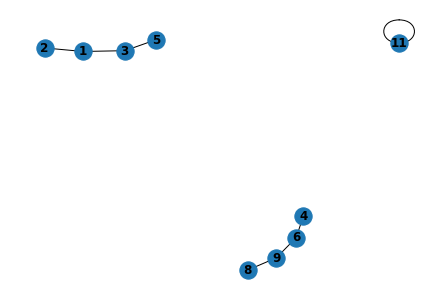

In [7]:
print(f'The connected components: {list(nx.connected_components(G))}')

nx.draw(G, with_labels=True, font_weight='bold')

<br>
<br>

# Determining Equivalent Geographic Points

A key set of issues, in relation to site identification codes of the ESPEN data sets, are

* Survey sites that have the same co&ouml;rdinate values have different site identification codes.

* Survey sites whose longitude or latitude values differ by fractions of a point, e.g., <br>

longitude | latitude
:--- | :---
33.87212 | -2.031722
33.872115 | -2.0317217

&nbsp; &nbsp; &nbsp; &nbsp; can have different site identification codes.

* Many observations do not have a site identification code.

The aim herein is to determine which co&ouml;rdinate points are more or less equivalent, and subsequently generate identification codes.  [At present](https://github.com/helminthiases/infections/blob/develop/config.py#L28), if $\lfloor \text{linear distance} \rfloor = 0$ between an observation point and its nearest point, then the points are equivalent.  The co&ouml;rdinates undergo [EPSG:3587](https://epsg.io/3857) transformation prior to distance calculations, hence the distance unit of meausre is metres.  



<br>

Each observation within the data sets of [helminthiases/infections/tree/develop/warehouse/data/ESPEN/networks/edges](https://github.com/helminthiases/infections/tree/develop/warehouse/data/ESPEN/networks/edges) includes the variables `src` & `dst`.  `src` is a *temporary observation identifier*, whilst `dst` is the *temporary observation identifier* of the nearest observation

$$
\textit{dst identifier} =
\begin{cases}
\textit{nearest observation identifier}, & \text{if } \lfloor\text{linear distance}\rfloor = 0 \\
\textit{src identifier}, & \text{if } \lfloor\text{linear distance}\rfloor > 0
\end{cases}
$$

Wherein **linear distance** is the distance between an observation and its nearest observation. 

<br>
<br>

## Points & Lines

If the entire [helminthiases hub](https://github.com/helminthiases) is available locally, then the data files in question will be available within

> `os.path.join(hub, 'infections', 'warehouse', 'data', 'ESPEN', 'networks', 'edges')`


In [8]:
parent = str(pathlib.Path(os.getcwd()).parent)
hub = os.path.dirname(parent)
os.path.basename(hub)

'helminthiases'

<br>

An experiments data set

In [9]:
url = 'https://raw.githubusercontent.com/helminthiases/infections/develop/warehouse/data/ESPEN/experiments/reduced/TZ.csv'
frame = pd.read_csv(filepath_or_buffer=url, header=0, encoding='utf-8')
frame.drop(columns='identifier', inplace=True)
frame.columns

Index(['iso3', 'iso2', 'admin1_id', 'admin2_id', 'iu_id', 'site_id',
       'longitude', 'latitude', 'georeliability', 'location_type',
       'survey_type', 'year', 'age_start', 'age_end', 'hk_examined',
       'hk_positive', 'asc_examined', 'asc_positive', 'tt_examined',
       'tt_positive', 'quality', 'sn', 'hk_prevalence', 'asc_prevalence',
       'tt_prevalence', 'sth_prevalence', 'shortest', 'id', 'src', 'dst'],
      dtype='object')

<br>

Using a few columns, and noting that $\; src \equiv id$

In [10]:
excerpt = frame[['longitude', 'latitude', 'georeliability', 'shortest', 'id', 'src', 'dst']]
excerpt.head(9)

,longitude,latitude,georeliability,shortest,id,src,dst
0,34.284892,-1.387712,3,4366.461723,0,0,0
1,32.078701,-5.079600,3,8973.961518,1,1,1
2,33.650000,-2.466667,1,6339.104344,3,3,3
3,29.619103,-4.898798,3,0.000000,5,5,6
4,29.619103,-4.898798,3,0.000000,6,6,5
5,38.340321,-6.225760,4,287.112621,10,10,10
6,29.619103,-4.898798,3,0.000000,12,12,5
7,39.799000,-7.850000,3,14422.968995,13,13,13
8,33.872120,-2.031722,3,0.557600,14,14,15


<br>
<br>

## Networks

In [11]:
connections = nx.from_pandas_edgelist(excerpt, source='src', target='dst')

<br>

Note:

* Nodes: `connections.nodes`
* Edges: `connections.edges`

In [12]:
list(connections.edges)[:27]

[(0, 0),
 (1, 1),
 (3, 3),
 (5, 6),
 (5, 12),
 (10, 10),
 (13, 13),
 (14, 15),
 (16, 16),
 (17, 678),
 (18, 1013),
 (19, 19),
 (20, 20),
 (22, 22),
 (26, 26),
 (29, 890),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38),
 (39, 39),
 (40, 41),
 (40, 42),
 (47, 47)]

<br>

**Connected Components**: Considering the data & edges previews above, it is expected that

* 5, 6, and 12 will belong to the same connected component
* 40, 41, and 42 will belong to the same connected component
* etc.



In [13]:
components = list(nx.connected_components(connections))

In [14]:
components[:9]

[{0}, {1}, {3}, {5, 6, 12}, {10}, {13}, {14, 15}, {16}, {17, 678}]

<br>

**A sample**

The connected components: [{0}, {1}, {3}, {12, 5, 6}, {10}, {13}, {14, 15}, {16}, {17, 678}, {18, 1013}, {19}, {20}, {22}, {26}, {890, 29}, {32}, {33}, {34}, {35}, {36}, {37}, {38}, {39}, {40, 41, 42}, {47}, {50}, {51, 52}, {56}, {515, 60}, {63}, {64}, {65}, {71}, {72, 110}, {73}, {904, 74}, {75}, {120, 76}, {77}, {78}, {81}, {82}, {155, 85}, {88}]


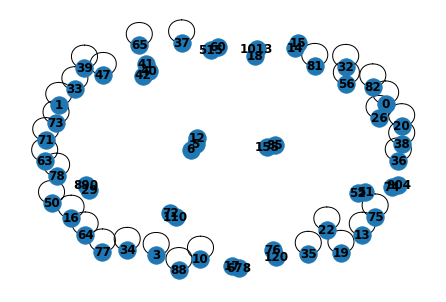

In [15]:
sample = excerpt.iloc[:50,]
nets = nx.from_pandas_edgelist(sample, source='src', target='dst')
print(f'The connected components: {list(nx.connected_components(nets))}')
nx.draw(nets, with_labels=True, font_weight='bold')

<br>
<br>

## Generating Identification Codes

In [16]:
type(components)

list

<br>

Setting-up the components within a data frame.

In [17]:
sample = pd.DataFrame(data = {'component': components})
sample.head()

,component
0,{0}
1,{1}
2,{3}
3,"{12, 5, 6}"
4,{10}


<br>

Hence, assigning identification codes to each set of components.

In [18]:
sample.loc[:, 'identifier'] = np.linspace(start=1, stop=sample.shape[0], num=sample.shape[0], endpoint=True, dtype=np.int64)
sample = sample.explode(column='component', ignore_index=True)
sample.loc[:, 'component'] = sample['component'].astype(np.int64, errors='raise').values
sample.head()

,component,identifier
0,0,1
1,1,2
2,3,3
3,12,4
4,5,4


<br>

Re-naming the `component` field to `id`, for data merging purposes.

In [19]:
sample.rename(columns={'component': 'id'}, inplace=True)
sample.head()

,id,identifier
0,0,1
1,1,2
2,3,3
3,12,4
4,5,4


<br>
<br>

## Join/Merge

Herein, we assign the new identification codes to each observation of the experiments data set.  This is done by merging

* `excerpt` & `sample`, or
* `frame` & `sample`

via field `id`.


In [20]:
excerpt.merge(sample, on='id', how='left').head(9)

,longitude,latitude,georeliability,shortest,id,src,dst,identifier
0,34.284892,-1.387712,3,4366.461723,0,0,0,1
1,32.078701,-5.079600,3,8973.961518,1,1,1,2
2,33.650000,-2.466667,1,6339.104344,3,3,3,3
3,29.619103,-4.898798,3,0.000000,5,5,6,4
4,29.619103,-4.898798,3,0.000000,6,6,5,4
5,38.340321,-6.225760,4,287.112621,10,10,10,5
6,29.619103,-4.898798,3,0.000000,12,12,5,4
7,39.799000,-7.850000,3,14422.968995,13,13,13,6
8,33.872120,-2.031722,3,0.557600,14,14,15,7


In [21]:
focus = frame.merge(sample, on='id', how='left')

In [22]:
focus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso3            668 non-null    object 
 1   iso2            668 non-null    object 
 2   admin1_id       645 non-null    float64
 3   admin2_id       618 non-null    float64
 4   iu_id           668 non-null    float64
 5   site_id         245 non-null    float64
 6   longitude       668 non-null    float64
 7   latitude        668 non-null    float64
 8   georeliability  668 non-null    int64  
 9   location_type   367 non-null    object 
 10  survey_type     412 non-null    object 
 11  year            668 non-null    float64
 12  age_start       358 non-null    float64
 13  age_end         358 non-null    float64
 14  hk_examined     668 non-null    int64  
 15  hk_positive     668 non-null    int64  
 16  asc_examined    668 non-null    int64  
 17  asc_positive    668 non-null    int

<br>
<br>

## Co&ouml;rdinates

Should each set of observations that have the same *new identification code* also have the same geographic co&ouml;rdinates?  Or, should their fractionally different values, if that be case, be kept? 

<br>

In [23]:
example = focus[['longitude', 'latitude', 'identifier', 'year']].sort_values(by=['identifier', 'year'], axis=0, ascending=True)
example.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   longitude   668 non-null    float64
 1   latitude    668 non-null    float64
 2   identifier  668 non-null    int64  
 3   year        668 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 26.1 KB


<br>

The most recent co&ouml;rdinates per distinct identification code.

In [24]:
points = example[['longitude', 'latitude', 'identifier']].groupby(by='identifier').agg(lambda x: x.iloc[-1])
points = points.copy().reset_index()
points

,identifier,longitude,latitude
0,1,34.284892,-1.387712
1,2,32.078701,-5.079600
2,3,33.650000,-2.466667
3,4,29.619103,-4.898798
4,5,38.340321,-6.225760
...,...,...,...
535,536,33.140301,-2.580750
536,537,38.847439,-6.586171
537,538,33.932637,-1.685413
538,539,38.984402,-5.119100
